In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), "..", "kNN_NBC", "x64", "Release"))
import pynbc

# Experiment 1 - 2 artificial clusters in dataset with different number of nearest neighbours

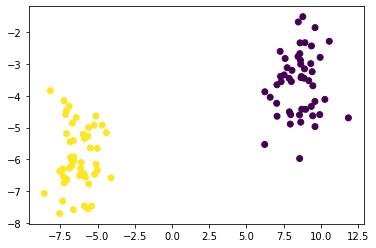

In [2]:
dataset = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 12345)
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = dataset[1])

For both KNN and K+NN variants of the algorithm we decided to begin with k=2 and increase it exponentially by a factor of 2 until visually good clustering was obtained.

## KNN

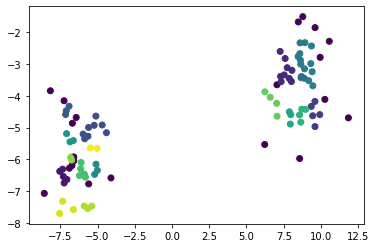

In [3]:
clusters = pynbc.nbc_kNN(2, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

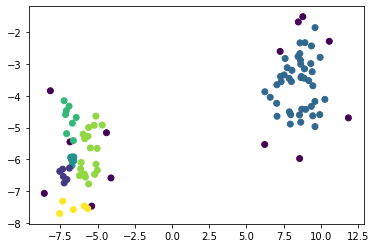

In [4]:
clusters = pynbc.nbc_kNN(4, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

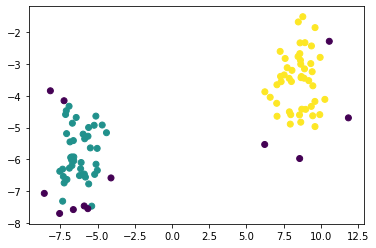

In [5]:
clusters = pynbc.nbc_kNN(8, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

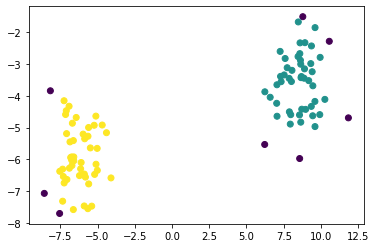

In [6]:
clusters = pynbc.nbc_kNN(16, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

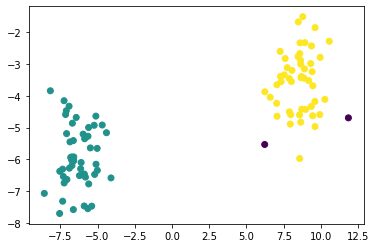

In [7]:
clusters = pynbc.nbc_kNN(32, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

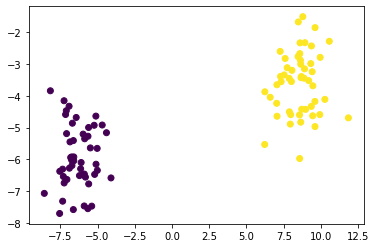

In [8]:
clusters = pynbc.nbc_kNN(49, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

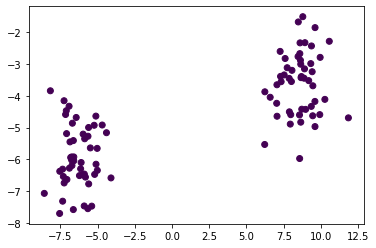

In [9]:
clusters = pynbc.nbc_kNN(50, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

## K+NN

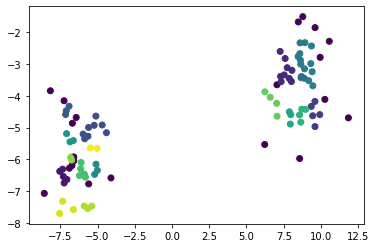

In [10]:
clusters = pynbc.nbc_kpNN(2, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

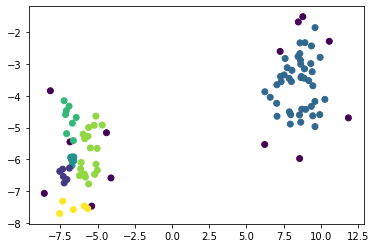

In [11]:
clusters = pynbc.nbc_kpNN(4, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

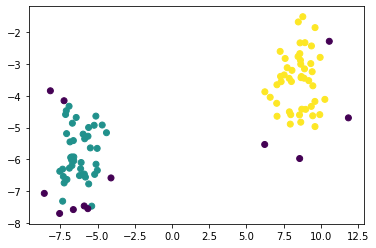

In [12]:
clusters = pynbc.nbc_kpNN(8, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

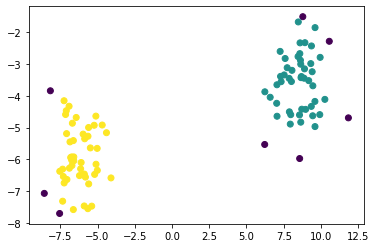

In [13]:
clusters = pynbc.nbc_kpNN(16, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

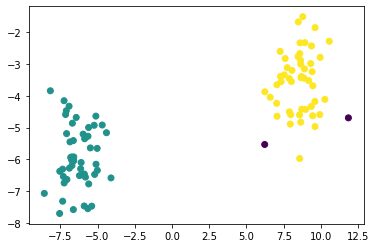

In [14]:
clusters = pynbc.nbc_kpNN(32, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

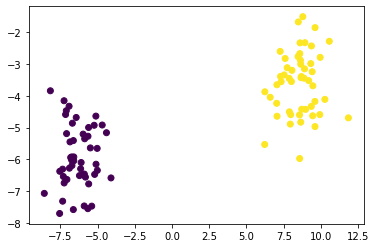

In [15]:
clusters = pynbc.nbc_kpNN(49, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

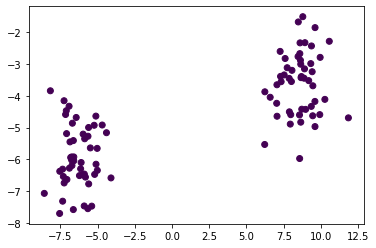

In [16]:
clusters = pynbc.nbc_kpNN(50, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

# Experiment 2 - 4 clusters

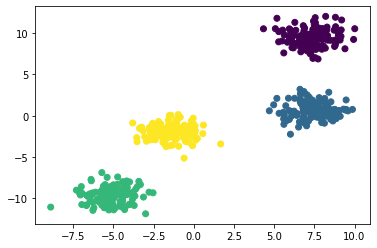

In [11]:
dataset = make_blobs(n_samples = 500, centers = 4, n_features = 2, random_state = 8)
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = dataset[1])

As for experiment 1 best results out of selected values for k were obtained when k was equal to 8 or 16, that for a dataset of 100 samples is close to a square root of its size, we decided to check if this heuristic will also yield good results for this dataset

## KNN

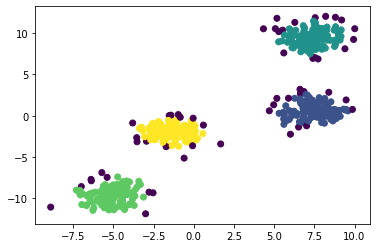

In [12]:
clusters = pynbc.nbc_kNN(int(500 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

## K+NN

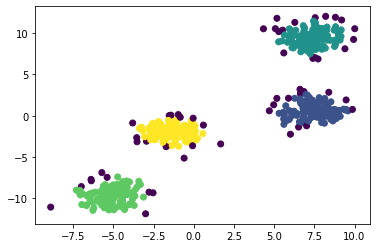

In [13]:
clusters = pynbc.nbc_kpNN(int(500 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

# Experiment 3 - single cluster and noise

While experiments 1 and 2 consisted of multiple clusters and can be seen as unsupervised classification tasks, this task consists of a single cluster and noise, so it can be compared to anomaly detection

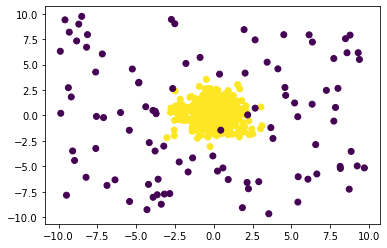

In [25]:
dataset = make_blobs(n_samples = 500, centers = [[0,0]], n_features = 2, cluster_std = 1)
generator = np.random.RandomState(42)
noise = generator.uniform(low = -10, high = 10, size=(100, 2))

dataset = (
    np.concatenate([dataset[0], noise], axis = 0), 
    [*dataset[1], *([-1] * noise.shape[0])]
)

plt.scatter(dataset[0][:,0], dataset[0][:,1], c = dataset[1])

## kNN

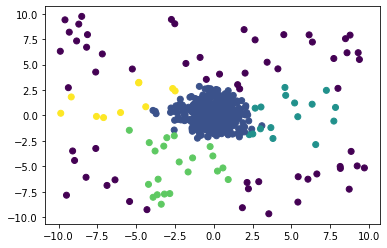

Cluster sizes
(-1, 59)
(0, 494)
(1, 16)
(2, 21)
(3, 10)


In [30]:
clusters = pynbc.nbc_kNN(int(600 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)
plt.show()

print('Cluster sizes', *zip(*np.unique(clusters, return_counts=True)), sep='\n')

## k+NN

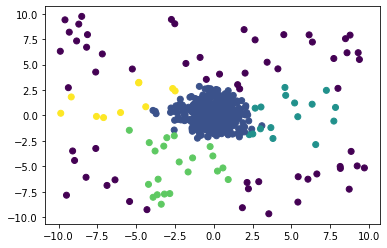

Cluster sizes
(-1, 59)
(0, 494)
(1, 16)
(2, 21)
(3, 10)


In [32]:
clusters = pynbc.nbc_kpNN(int(600 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)
plt.show()

print('Cluster sizes', *zip(*np.unique(clusters, return_counts=True)), sep='\n')

# Experiment 4 - dataset prepared to give different outputs in kNN and k+NN

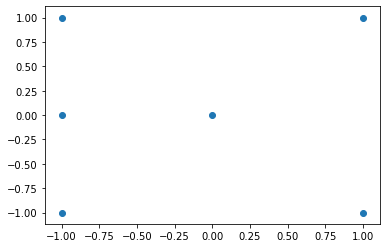

In [2]:
dataset = np.array([[1.0, 1.0], [1.0, -1.0], [-1.0, -1.0], [-1.0, 1.0], [-1.0, 0.0], [0.0, 0.0]])
plt.scatter(dataset[:,0], dataset[:,1])

This task uses small dataset of 6 points, with coordinates specified in a way that, for k=1:

 - for different variants of neihbouhood different results will be obtained
 - for kNN for different reference point selection strategies different results will be obtained

Small size of this dataset allows human to follow the execution step by step using debugging tools

## kNN

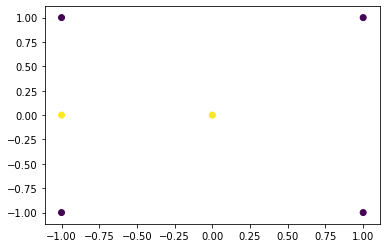

In [18]:
clusters = pynbc.nbc_kNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

## k+NN

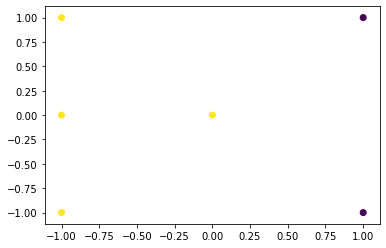

In [19]:
clusters = pynbc.nbc_kpNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

# Experiment 5: different strategy of choosing reference point

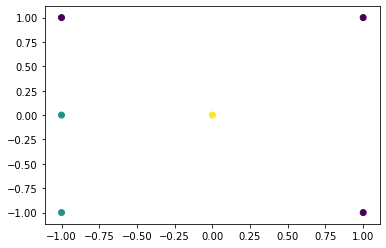

In [3]:
clusters = pynbc.nbc_kNN(1, -1, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

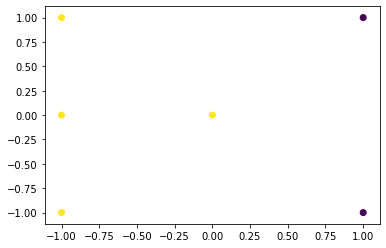

In [4]:
clusters = pynbc.nbc_kpNN(1, -1, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

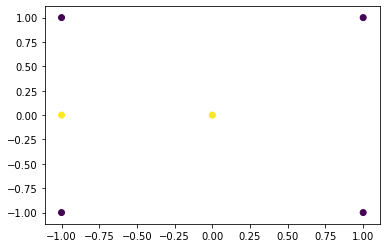

In [6]:
clusters = pynbc.nbc_kNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

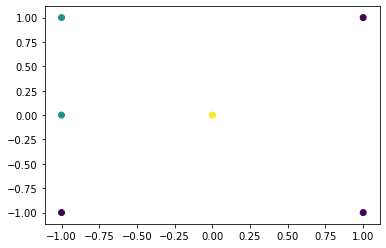

In [21]:
clusters = pynbc.nbc_kNN(1, 1, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

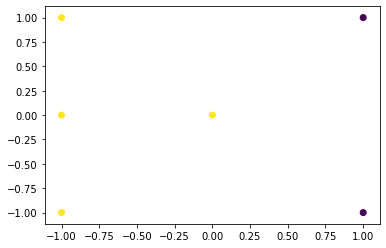

In [22]:
clusters = pynbc.nbc_kpNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

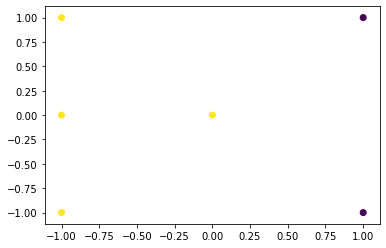

In [23]:
clusters = pynbc.nbc_kpNN(1, 1, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

Results explanation for experiments #4 and #5:

 - The point (-1, 0) is the nearest neighbours of points (-1, -1), (-1, 1) and (0, 0).
 - The point (0, 0) is the nearest neighbour of points (1, -1) and (-1, 1)
 - The nearest neighbourhood of point (-1, 0) differs:
   - For K+NN neighbourhood it consists of all three points (-1, -1), (-1, 1) and (0, 0)
   - For KNN neighbourhood it is only one of them:
     - (0, 0) for MIN_VALUE reference point selection strategy
     - (-1, 1) for MAX_VALUE reference point selection strategy
 - points (1, -1) and (1, 1) are never not in any other points' neighborhood, thus they always have NDF = 0 and are locally sparse
 - point (-1, 0) has reverse neighbourhood size equal to 3. 
   - For KNN it has neighbourhood size equal to 1 and thus is locally dense
   - For K+NN it has neighbourhood size equal to 3 and thus is locally even
 - point (-1, 1) has neihbourhood of size 1 and reverse neighbourhood of size:
   - 1 for K+NN and KNN with MAX_VALUE strategy and is locally even
   - 0 for KNN with MIN_VALUE strategy and is locally sparse
 - point (-1, -1) has neigbourhood of size 1 and reverse neighbourhood of size:
   - 1 for K+NN and is locally even
   - 0 for KNN and is locally sparse
 - point (0, 0) has neighbourhood of size 1 and reverse neighbourhood of size at least 2, and thus is always locally dense.
 - Finally:
   - For K+NN (1, -1) and (1, 1) are locally sparse, (0, 0) is locally dense and (-1, \*) are locally even. Cluster is built starting with (0, 0) and spreads through its neighbour (-1, 0) to (-1, -1) and (-1, 1)
   - For KNN with MIN_VALUE strategy points (-1, 0) and (0, 0) are locally dense and the rest is locally sparse. As the locally dense point's are in each other neighbourhoods they create the only cluster
   - For KNN with MAX_VALUE strategy points (-1, 0) and (0, 0) are locally dense, (-1, 1) is locally even and the rest is locally sparse.
     - The first cluster is built starting with (-1, 0) and spreads to its neighbour: (-1, 1)
     - The second cluster is built starting with (0, 0). As its neighbourhood consists only of point (-1, 0) that already is in the first cluster, the second cluster contains only one point.
 